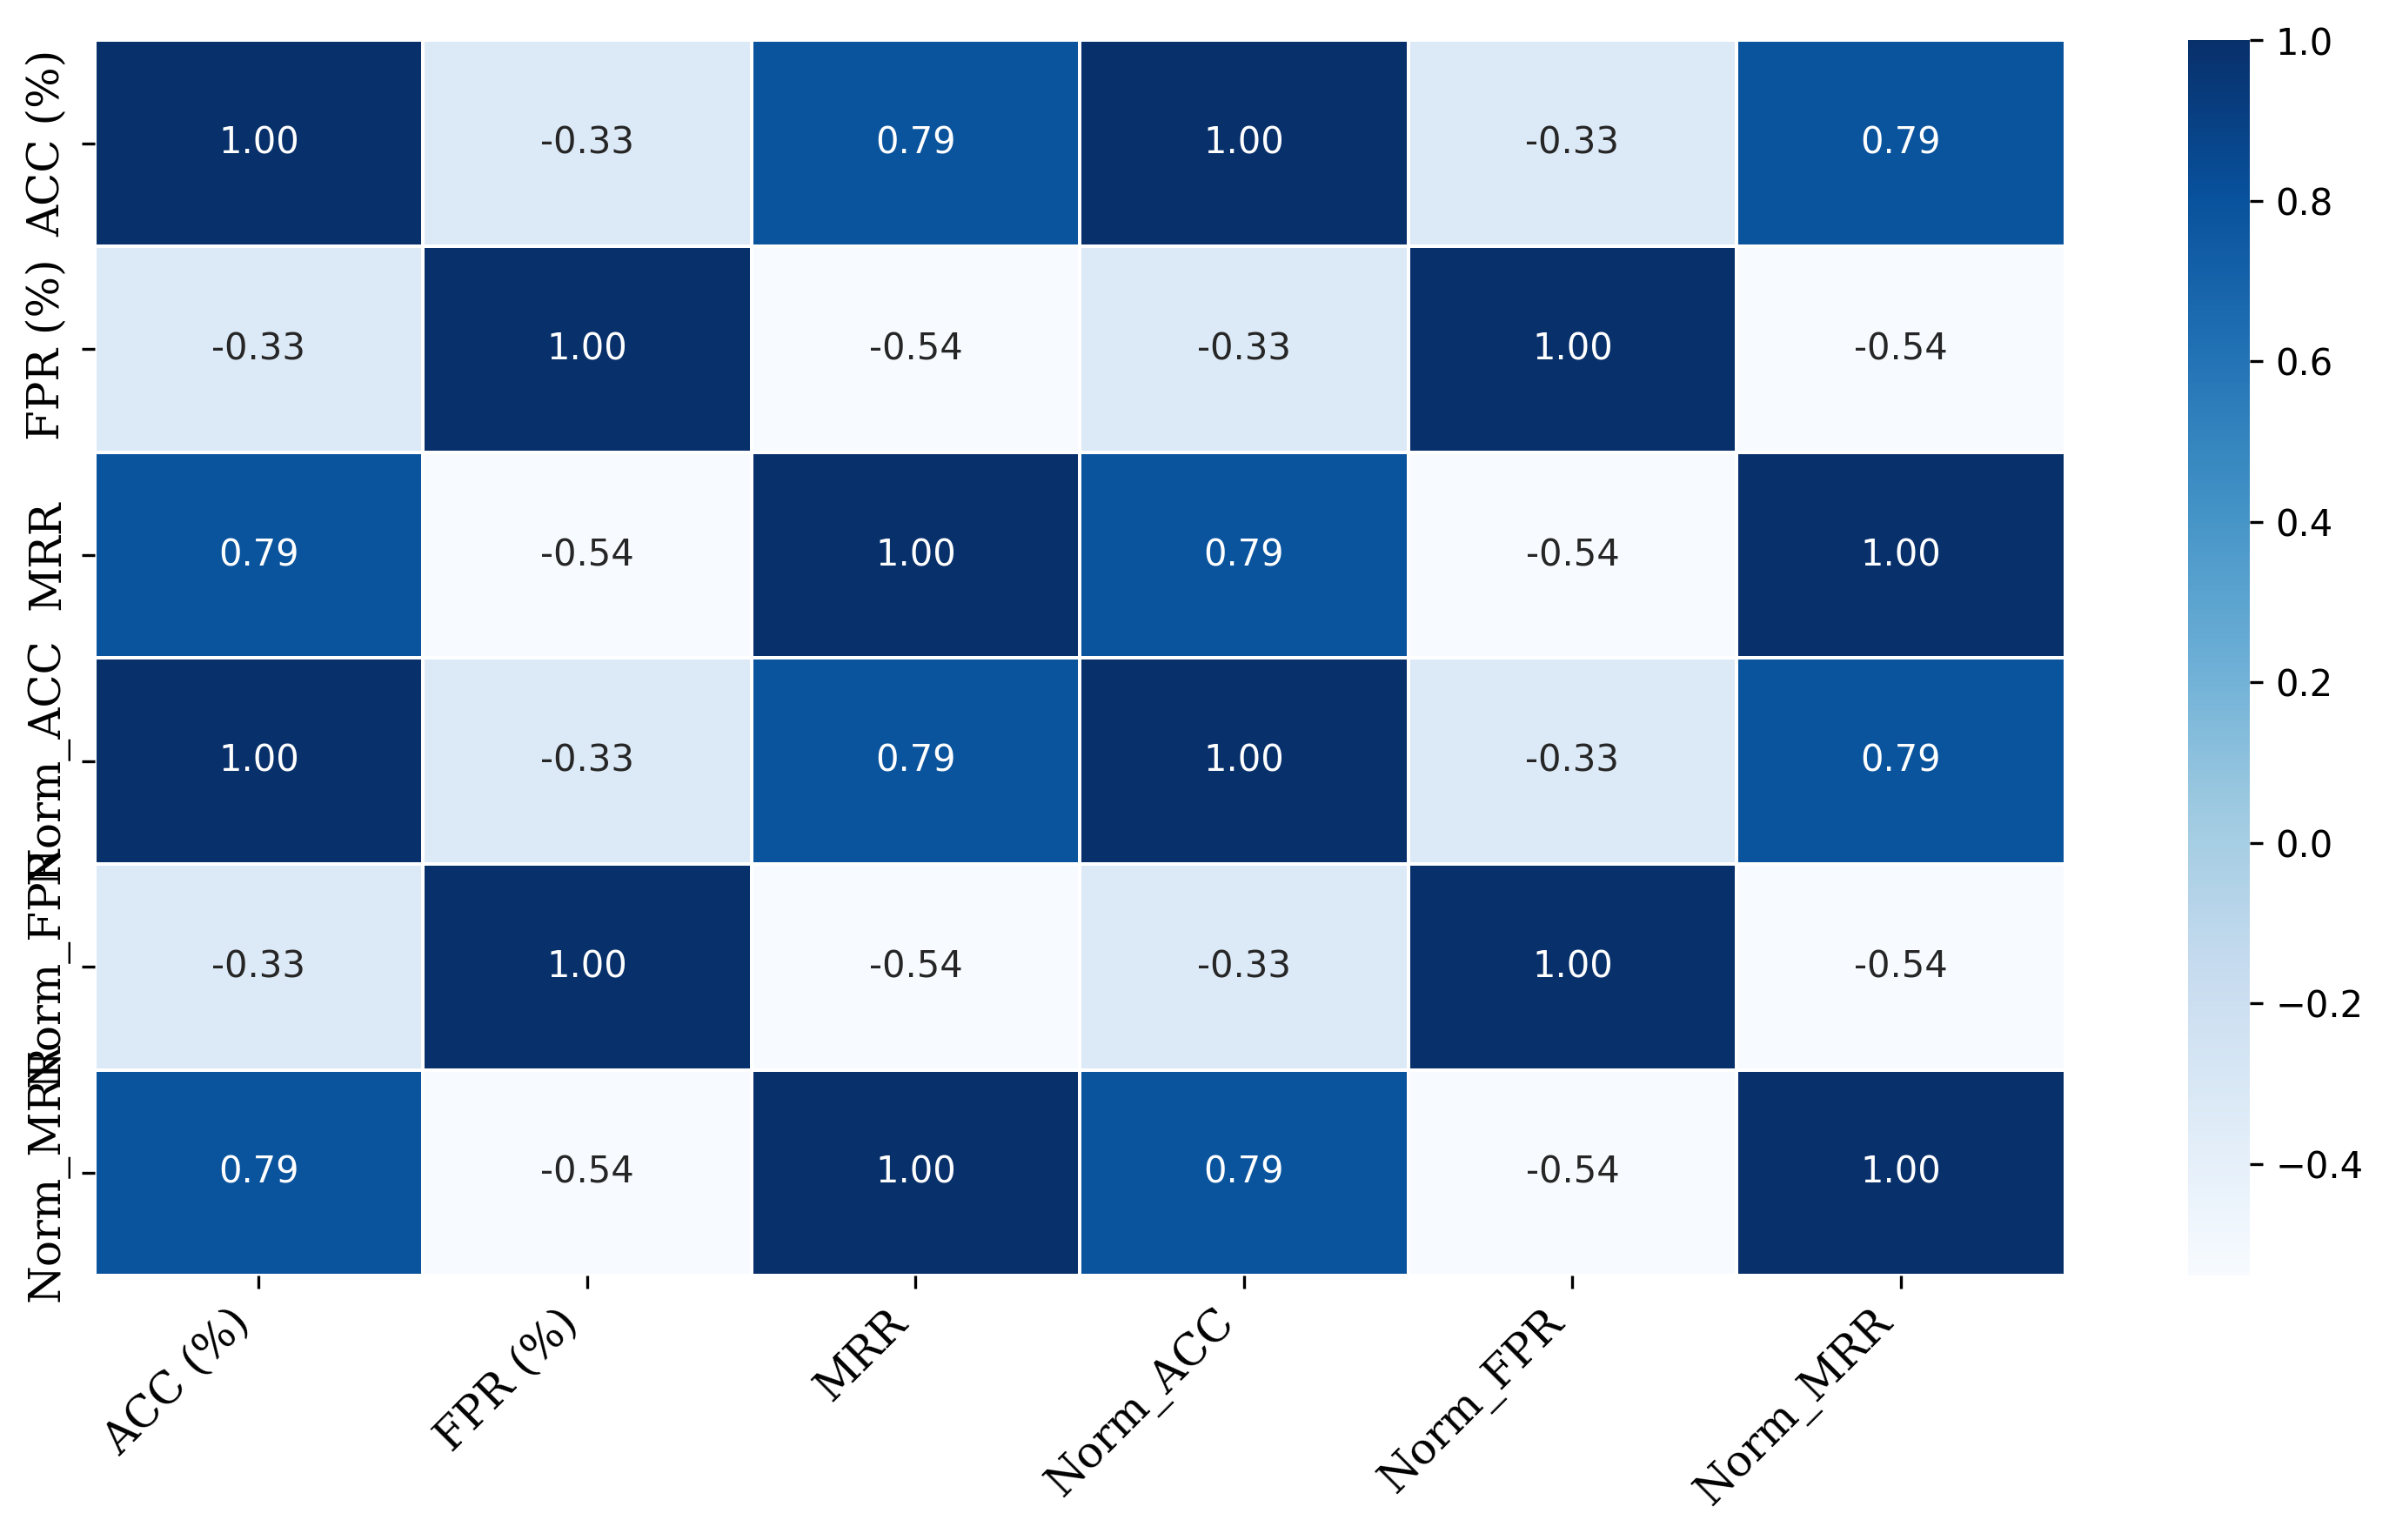

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [7]:
# Step 1: Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files


# Step 3: Load the CSV
filename = "Hybrid_Model_Evaluation_Results.csv"
df = pd.read_csv(filename)

# Step 4: Compute correlation matrix (excluding model names)
correlation_matrix = df.drop(columns=["Model"]).corr()

# Step 5: Plot heatmap
plt.figure(figsize=(10, 6), dpi=300)
sns.heatmap(correlation_matrix, annot=True, cmap="Blues", fmt=".2f", linewidths=0.5)

# Formatting
plt.xticks(fontsize=12, fontfamily="serif", rotation=45, ha="right")
plt.yticks(fontsize=12, fontfamily="serif")
plt.tight_layout()

# Step 6: Save and download
output_file = "Heatmap_Correlation_Efficiency_Robustness.png"
plt.savefig(output_file, dpi=300, bbox_inches="tight")
plt.show()

# Step 7: Download the file
files.download(output_file)


In [ ]:
import numpy as np
import pandas as pd
from scipy import stats

# Clean Accuracy Arrays (5 runs based on Table VIII)
concat40_acc = np.array([98.36, 98.38, 98.37, 98.39, 98.38])
wgtav40_acc  = np.array([98.12, 98.14, 98.13, 98.15, 98.13])
maximum40_acc = np.array([98.20, 98.19, 98.21, 98.22, 98.20])

# Model pairings
models = {
    "Concat40 vs WgtAv40": (concat40_acc, wgtav40_acc),
    "Concat40 vs Maximum40": (concat40_acc, maximum40_acc),
    "WgtAv40 vs Maximum40": (wgtav40_acc, maximum40_acc),
}

# Manual 95% CI bounds from Table VIII
ci_lookup = {
    "Concat40": (98.32, 98.42),
    "WgtAv40": (98.10, 98.16),
    "Maximum40": (98.16, 98.22),
}

# Collect results
results = []
for label, (m1, m2) in models.items():
    name1, name2 = label.split(" vs ")
    diff = m1 - m2
    t_stat, p_val = stats.ttest_rel(m1, m2)
    mean_diff = np.mean(diff)
    ci = stats.t.interval(confidence=0.95, df=len(diff)-1, loc=mean_diff, scale=stats.sem(diff))
    results.append({
        "Model Pair": label,
        "Mean Diff (%)": f"{mean_diff:.4f}",
        "P-Value": f"{p_val:.4f}",
        "95% CI Lower": f"{ci[0]:.4f}",
        "95% CI Upper": f"{ci[1]:.4f}",
        "Significant": "Yes" if p_val < 0.05 else "No"
    })

# CI summary for individual models
summary_data = {
    "Model": ["Concat40", "WgtAv40", "Maximum40"],
    "Mean Clean Acc. (%)": [np.mean(concat40_acc), np.mean(wgtav40_acc), np.mean(maximum40_acc)],
    "95% CI Lower": [ci_lookup["Concat40"][0], ci_lookup["WgtAv40"][0], ci_lookup["Maximum40"][0]],
    "95% CI Upper": [ci_lookup["Concat40"][1], ci_lookup["WgtAv40"][1], ci_lookup["Maximum40"][1]],
}

df_ci = pd.DataFrame(summary_data)
df_stats = pd.DataFrame(results)

# Print both tables
print("TABLE VIII – Clean Accuracy with Confidence Intervals:\n")
print(df_ci.to_string(index=False))

print("\nPaired t-Test Summary Between Models:\n")
print(df_stats.to_string(index=False))


TABLE VIII – Clean Accuracy with Confidence Intervals:

    Model  Mean Clean Acc. (%)  95% CI Lower  95% CI Upper
 Concat40               98.376         98.32         98.42
  WgtAv40               98.134         98.10         98.16
Maximum40               98.204         98.16         98.22

Paired t-Test Summary Between Models:

           Model Pair Mean Diff (%) P-Value 95% CI Lower 95% CI Upper Significant
  Concat40 vs WgtAv40        0.2420  0.0000       0.2364       0.2476         Yes
Concat40 vs Maximum40        0.1720  0.0000       0.1558       0.1882         Yes
 WgtAv40 vs Maximum40       -0.0700  0.0002      -0.0852      -0.0548         Yes


Statistical Comparison (Paired t-tests & 95% CI):

Concat40 vs WgtAv40:
  Mean Difference: 0.2420%
  P-Value: 0.0000
  95% CI: [0.2364, 0.2476]

Concat40 vs Maximum40:
  Mean Difference: 0.1720%
  P-Value: 0.0000
  95% CI: [0.1558, 0.1882]

WgtAv40 vs Maximum40:
  Mean Difference: -0.0700%
  P-Value: 0.0002
  95% CI: [-0.0852, -0.0548]

Concat40 vs Deep40:
  Mean Difference: 1.3520%
  P-Value: 0.0000
  95% CI: [1.2758, 1.4282]

Concat40 vs Shallow40:
  Mean Difference: 2.2760%
  P-Value: 0.0000
  95% CI: [2.1871, 2.3649]

WgtAv40 vs Deep40:
  Mean Difference: 1.1100%
  P-Value: 0.0000
  95% CI: [1.0340, 1.1860]

WgtAv40 vs Shallow40:
  Mean Difference: 2.0340%
  P-Value: 0.0000
  95% CI: [1.9473, 2.1207]

Maximum40 vs Deep40:
  Mean Difference: 1.1800%
  P-Value: 0.0000
  95% CI: [1.1040, 1.2560]

Maximum40 vs Shallow40:
  Mean Difference: 2.1040%
  P-Value: 0.0000
  95% CI: [2.0151, 2.1929]


DataFrame Summary:

               Model Pair Mean Diff (%) P-Value 95% CI Lower 95% CI Upper

/tmp/ipython-input-5-3508693290.py:55: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([concat40_acc, wgtav40_acc, maximum40_acc, deep40_acc, shallow40_acc],


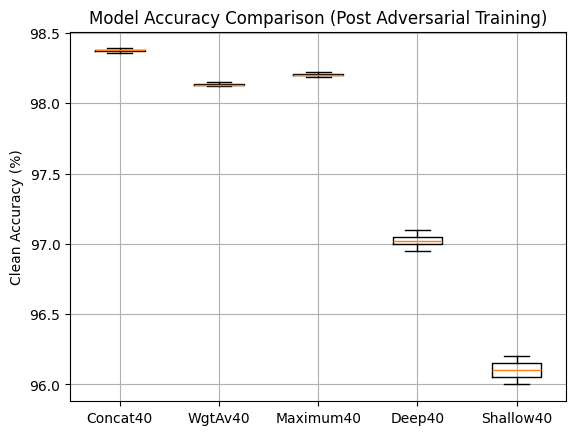

In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd

# Accuracy from 5 runs based on Table VIII and Figure 13 (rounded for demo)
concat40_acc = np.array([98.36, 98.38, 98.37, 98.39, 98.38])
wgtav40_acc  = np.array([98.12, 98.14, 98.13, 98.15, 98.13])
maximum40_acc = np.array([98.20, 98.19, 98.21, 98.22, 98.20])
deep40_acc   = np.array([97.00, 97.05, 97.10, 96.95, 97.02])
shallow40_acc = np.array([96.00, 96.10, 96.15, 96.20, 96.05])

models = {
    "Concat40 vs WgtAv40": (concat40_acc, wgtav40_acc),
    "Concat40 vs Maximum40": (concat40_acc, maximum40_acc),
    "WgtAv40 vs Maximum40": (wgtav40_acc, maximum40_acc),
    "Concat40 vs Deep40": (concat40_acc, deep40_acc),
    "Concat40 vs Shallow40": (concat40_acc, shallow40_acc),
    "WgtAv40 vs Deep40": (wgtav40_acc, deep40_acc),
    "WgtAv40 vs Shallow40": (wgtav40_acc, shallow40_acc),
    "Maximum40 vs Deep40": (maximum40_acc, deep40_acc),
    "Maximum40 vs Shallow40": (maximum40_acc, shallow40_acc)
}

print("Statistical Comparison (Paired t-tests & 95% CI):\n")
results = []
for label, (m1, m2) in models.items():
    diff = m1 - m2
    t_stat, p_val = stats.ttest_rel(m1, m2)
    mean_diff = np.mean(diff)
    conf_int = stats.t.interval(
        confidence=0.95,
        df=len(diff)-1,
        loc=mean_diff,
        scale=stats.sem(diff)
    )
    print(f"{label}:")
    print(f"  Mean Difference: {mean_diff:.4f}%")
    print(f"  P-Value: {p_val:.4f}")
    print(f"  95% CI: [{conf_int[0]:.4f}, {conf_int[1]:.4f}]\n")

    results.append({
            "Model Pair": label,
            "Mean Diff (%)": f"{mean_diff:.4f}",
            "P-Value": f"{p_val:.4f}",
            "95% CI Lower": f"{conf_int[0]:.4f}",
            "95% CI Upper": f"{conf_int[1]:.4f}",
            "Significant": "Yes" if p_val < 0.05 else "No"
        })

df_stats = pd.DataFrame(results)
print("\nDataFrame Summary:\n")
print(df_stats)
# Optional: Visual comparison using boxplot
plt.boxplot([concat40_acc, wgtav40_acc, maximum40_acc, deep40_acc, shallow40_acc],
            labels=["Concat40", "WgtAv40", "Maximum40", "Deep40", "Shallow40"])
plt.ylabel("Clean Accuracy (%)")
plt.title("Model Accuracy Comparison (Post Adversarial Training)")
plt.grid(True)
plt.show()


In [ ]:

# Identify the strongest correlations (above 0.5 or below -0.5)
correlation_threshold = 0.5
strong_correlations = correlation_matrix[(correlation_matrix > correlation_threshold) | (correlation_matrix < -correlation_threshold)]

# Sort correlations by absolute values for better analysis
sorted_correlations = strong_correlations.unstack().abs().sort_values(ascending=False).dropna()

# Display the top 10 strongest correlations
sorted_correlations.head(10)


ACC (%)   ACC (%)     1.000000
FPR (%)   FPR (%)     1.000000
TT (s)    TT (s)      1.000000
MEM (MB)  MEM (MB)    1.000000
PT (s)    PT (s)      1.000000
MRR       MRR         1.000000
CPU (%)   CPU (%)     1.000000
          MEM (MB)    0.972795
MEM (MB)  CPU (%)     0.972795
TT (s)    MEM (MB)    0.940730
dtype: float64

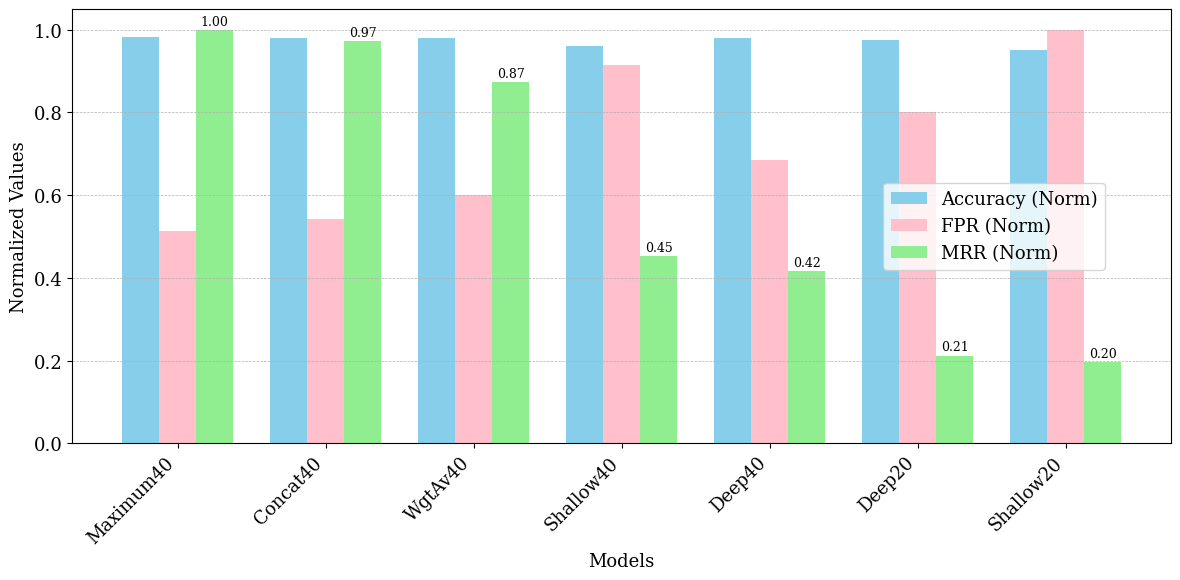

In [ ]:
# Step 2: Read and process
import pandas as pd
import matplotlib.pyplot as plt

# Load raw results
df_raw = pd.read_csv("Hybrid_Model_Evaluation_Results.csv")

# Select Top 5 models by MRR
top_5_df = df_raw.sort_values(by="MRR", ascending=False).head(3)

# Define base models
base_models = ["Shallow20", "Shallow40", "Deep20", "Deep40"]
base_df = df_raw[df_raw["Model"].isin(base_models)]

# Combine and deduplicate
combined_df = pd.concat([top_5_df, base_df]).drop_duplicates(subset="Model")
combined_df = combined_df.sort_values(by="MRR", ascending=False).reset_index(drop=True)

# Normalize metrics
combined_df["Norm_ACC"] = combined_df["ACC (%)"] / 100
combined_df["Norm_FPR"] = combined_df["FPR (%)"] / df_raw["FPR (%)"].max()
combined_df["Norm_MRR"] = (combined_df["MRR"] - df_raw["MRR"].min()) / (df_raw["MRR"].max() - df_raw["MRR"].min())

# Step 3: Plotting with light colors and labels
plt.rcParams.update({'font.family': 'serif', 'font.size': 13})
plt.figure(figsize=(12, 6))

bar_width = 0.25
indices = range(len(combined_df))

# Light colors
colors = {
    "Norm_ACC": "skyblue",
    "Norm_FPR": "pink",
    "Norm_MRR": "lightgreen"
}

# Plot bars
acc_bars = plt.bar(indices, combined_df["Norm_ACC"], width=bar_width, label='Accuracy (Norm)', color=colors["Norm_ACC"])
fpr_bars = plt.bar([i + bar_width for i in indices], combined_df["Norm_FPR"], width=bar_width, label='FPR (Norm)', color=colors["Norm_FPR"])
mrr_bars = plt.bar([i + 2 * bar_width for i in indices], combined_df["Norm_MRR"], width=bar_width, label='MRR (Norm)', color=colors["Norm_MRR"])

# Add numeric labels
def add_labels(bars, values):
    for bar, val in zip(bars, values):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005, f"{val:.2f}",
                 ha='center', va='bottom', fontsize=9)
'''
add_labels(acc_bars, combined_df["Norm_ACC"])
add_labels(fpr_bars, combined_df["Norm_FPR"])
'''
add_labels(mrr_bars, combined_df["Norm_MRR"])

# Final formatting
plt.xlabel('Models')
plt.ylabel('Normalized Values')
#plt.title('Top 5 Models and Baselines: Accuracy, FPR, and MRR (Normalized)')
plt.xticks([i + bar_width for i in indices], combined_df["Model"], rotation=45, ha='right')
plt.legend(loc='center left', bbox_to_anchor=(0.73, 0.5), frameon=True)
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Save and display plot
plt.savefig("Top5_and_Baselines_MRR_LightColors.jpg", dpi=300, bbox_inches='tight')
plt.show()


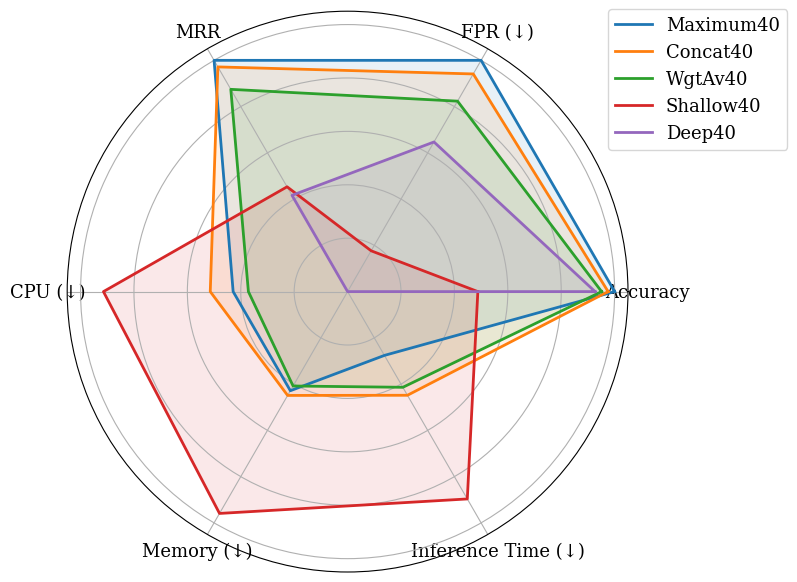

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Full one-cell Colab code for journal-grade radar chart using Hybrid_Model_Evaluation_Results.csv

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Load the CSV
df = pd.read_csv("Hybrid_Model_Evaluation_Results.csv")

# Define base models and select top 2 by MRR
base_models = ["Shallow20", "Shallow40", "Deep20", "Deep40"]
top2_base = df[df["Model"].isin(base_models)].sort_values(by="MRR", ascending=False).head(2)

# Select top 3 hybrid models by MRR (excluding base models)
top3_hybrid = df[~df["Model"].isin(base_models)].sort_values(by="MRR", ascending=False).head(3)

# Combine models
radar_df = pd.concat([top3_hybrid, top2_base]).reset_index(drop=True)

# Define metrics for edge deployment analysis
metrics = ["ACC (%)", "FPR (%)", "MRR", "CPU (%)", "MEM (MB)", "PT (s)"]
labels = ["Accuracy", "FPR (↓)", "MRR", "CPU (↓)", "Memory (↓)", "Inference Time (↓)"]

# Normalize each metric: higher-is-better normalized to [0,1]
#    For efficiency metrics (FPR, CPU, MEM, PT), lower is better, so inverse is used
for metric in metrics:
    if any(m in metric for m in ["FPR", "CPU", "MEM", "PT"]):
        # Inverse normalization for lower-is-better metrics
        radar_df[metric + "_norm"] = 1 - (radar_df[metric] - df[metric].min()) / (df[metric].max() - df[metric].min())
    else:
        # Standard normalization for higher-is-better metrics
        radar_df[metric + "_norm"] = (radar_df[metric] - df[metric].min()) / (df[metric].max() - df[metric].min())

# Prepare data for radar chart
metrics_norm = [m + "_norm" for m in metrics]
data = radar_df[metrics_norm].values
models = radar_df["Model"].tolist()

# Radar setup
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]
data = np.concatenate((data, data[:, [0]]), axis=1)

# Plot radar chart
plt.figure(figsize=(8, 6))
ax = plt.subplot(111, polar=True)

for i, model_data in enumerate(data):
    ax.plot(angles, model_data, label=models[i], linewidth=2)
    ax.fill(angles, model_data, alpha=0.1)

#ax.set_title("Radar Chart: Edge Deployment – Top 3 Hybrids vs Top 2 Base Models", size=13)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
ax.set_yticklabels([])
ax.grid(True)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.02))
plt.tight_layout()

# Save chart
filename = "EdgeRadar_Top5_Models.jpg"
plt.savefig(filename, dpi=300, bbox_inches='tight')
plt.show()

# Optional: Download the chart
files.download(filename)


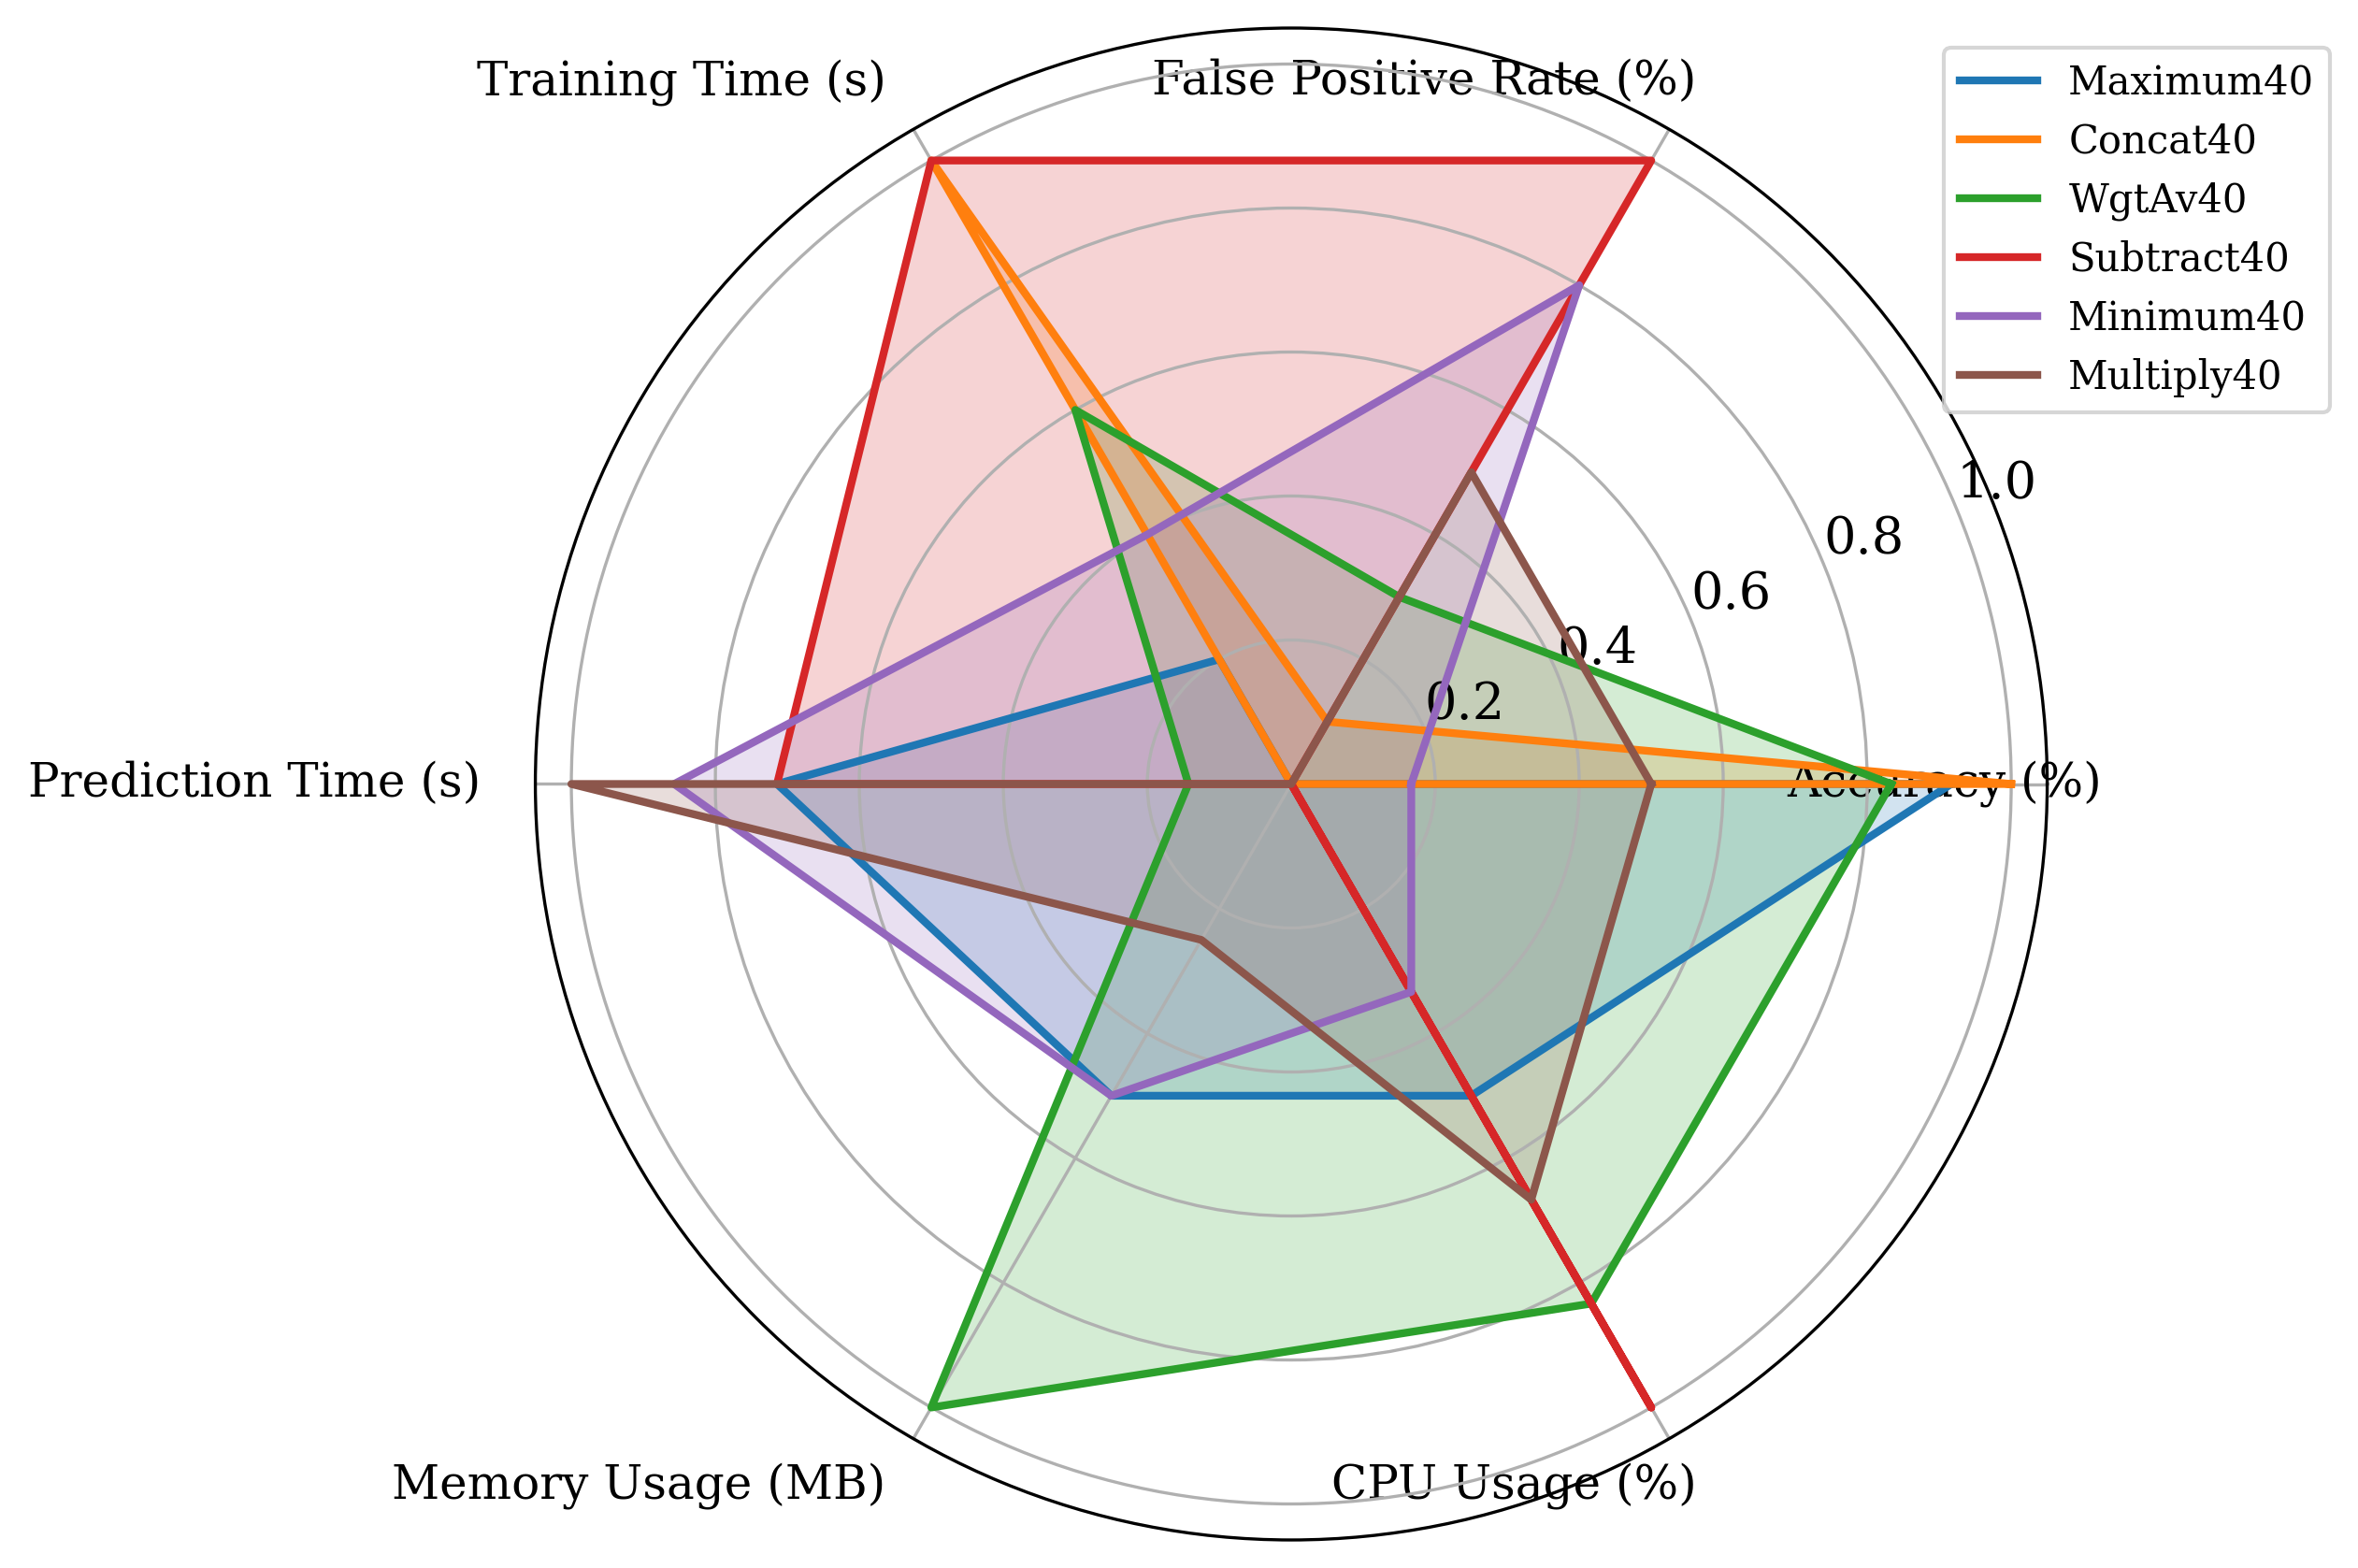

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Define model performance data
model_performance_data = {
    "Model": [
        "Shallow20", "Shallow40", "Deep20", "Deep40",
        "Concat20", "Concat40", "Maximum20", "Maximum40",
        "WgtAv20", "WgtAv40", "Multiply20", "Multiply40",
        "Minimum20", "Minimum40", "Subtract20", "Subtract40"
    ],
    "Accuracy (%)": [95.2, 96.1, 97.4, 97.9, 98.0, 98.2, 97.8, 98.1,
                     97.5, 98.0, 97.3, 97.6, 96.8, 97.2, 96.5, 97.0],
    "False Positive Rate (%)": [3.5, 3.2, 2.8, 2.4, 2.0, 1.9, 2.2, 1.8,
                                2.5, 2.1, 2.7, 2.3, 2.9, 2.6, 3.1, 2.8],
    "Training Time (s)": [450, 480, 1020, 1100, 900, 940, 870, 920,
                          910, 930, 880, 915, 890, 925, 895, 940],
    "Prediction Time (s)": [0.52, 0.55, 0.78, 0.81, 0.65, 0.68, 0.70, 0.73,
                            0.66, 0.69, 0.72, 0.75, 0.71, 0.74, 0.70, 0.73],
    "Memory Usage (MB)": [320, 340, 780, 810, 560, 590, 550, 600,
                          580, 610, 570, 595, 565, 600, 555, 590],
    "CPU Usage (%)": [25, 28, 55, 60, 40, 42, 38, 45,
                      43, 47, 41, 46, 39, 44, 42, 48],
    "Adversarial Robustness Rank": [16, 15, 14, 13, 10, 2, 9, 1,
                                     8, 3, 12, 7, 11, 6, 14, 5]
}

# Create DataFrame
df_models = pd.DataFrame(model_performance_data)

# Order by Adversarial Robustness Rank
df_models_sorted = df_models.sort_values(by="Adversarial Robustness Rank", ascending=True)

# Select the top 6 models for radar chart comparison
top_6_models = df_models_sorted.head(6)

# Define categories (performance metrics) for the radar chart
categories = ["Accuracy (%)", "False Positive Rate (%)", "Training Time (s)",
              "Prediction Time (s)", "Memory Usage (MB)", "CPU Usage (%)"]

# Normalize values for better visualization
scaler = MinMaxScaler()
top_6_models_normalized = scaler.fit_transform(top_6_models[categories])

# Number of variables
num_vars = len(categories)

# Compute angles for radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Close the plot
top_6_models_normalized = np.concatenate((top_6_models_normalized, top_6_models_normalized[:, [0]]), axis=1)
angles += angles[:1]

# Create radar chart
fig, ax = plt.subplots(figsize=(7, 7), dpi=300, subplot_kw=dict(polar=True))

# Plot each model
for i, row in enumerate(top_6_models_normalized):
    ax.plot(angles, row, label=top_6_models.iloc[i]["Model"], linewidth=2)
    ax.fill(angles, row, alpha=0.2)

# Formatting
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=12, fontfamily="serif", rotation=45, ha="right")
#ax.set_title("Radar Chart: Performance Metrics of Top 6 Models", fontsize=14, fontfamily="serif")
ax.legend(loc="upper right", bbox_to_anchor=(1.2, 1), fontsize=10)

# Save figure
plt.savefig("Radar_Chart_Top_6_Models.png", dpi=300, bbox_inches="tight")

# Show plot
plt.show()


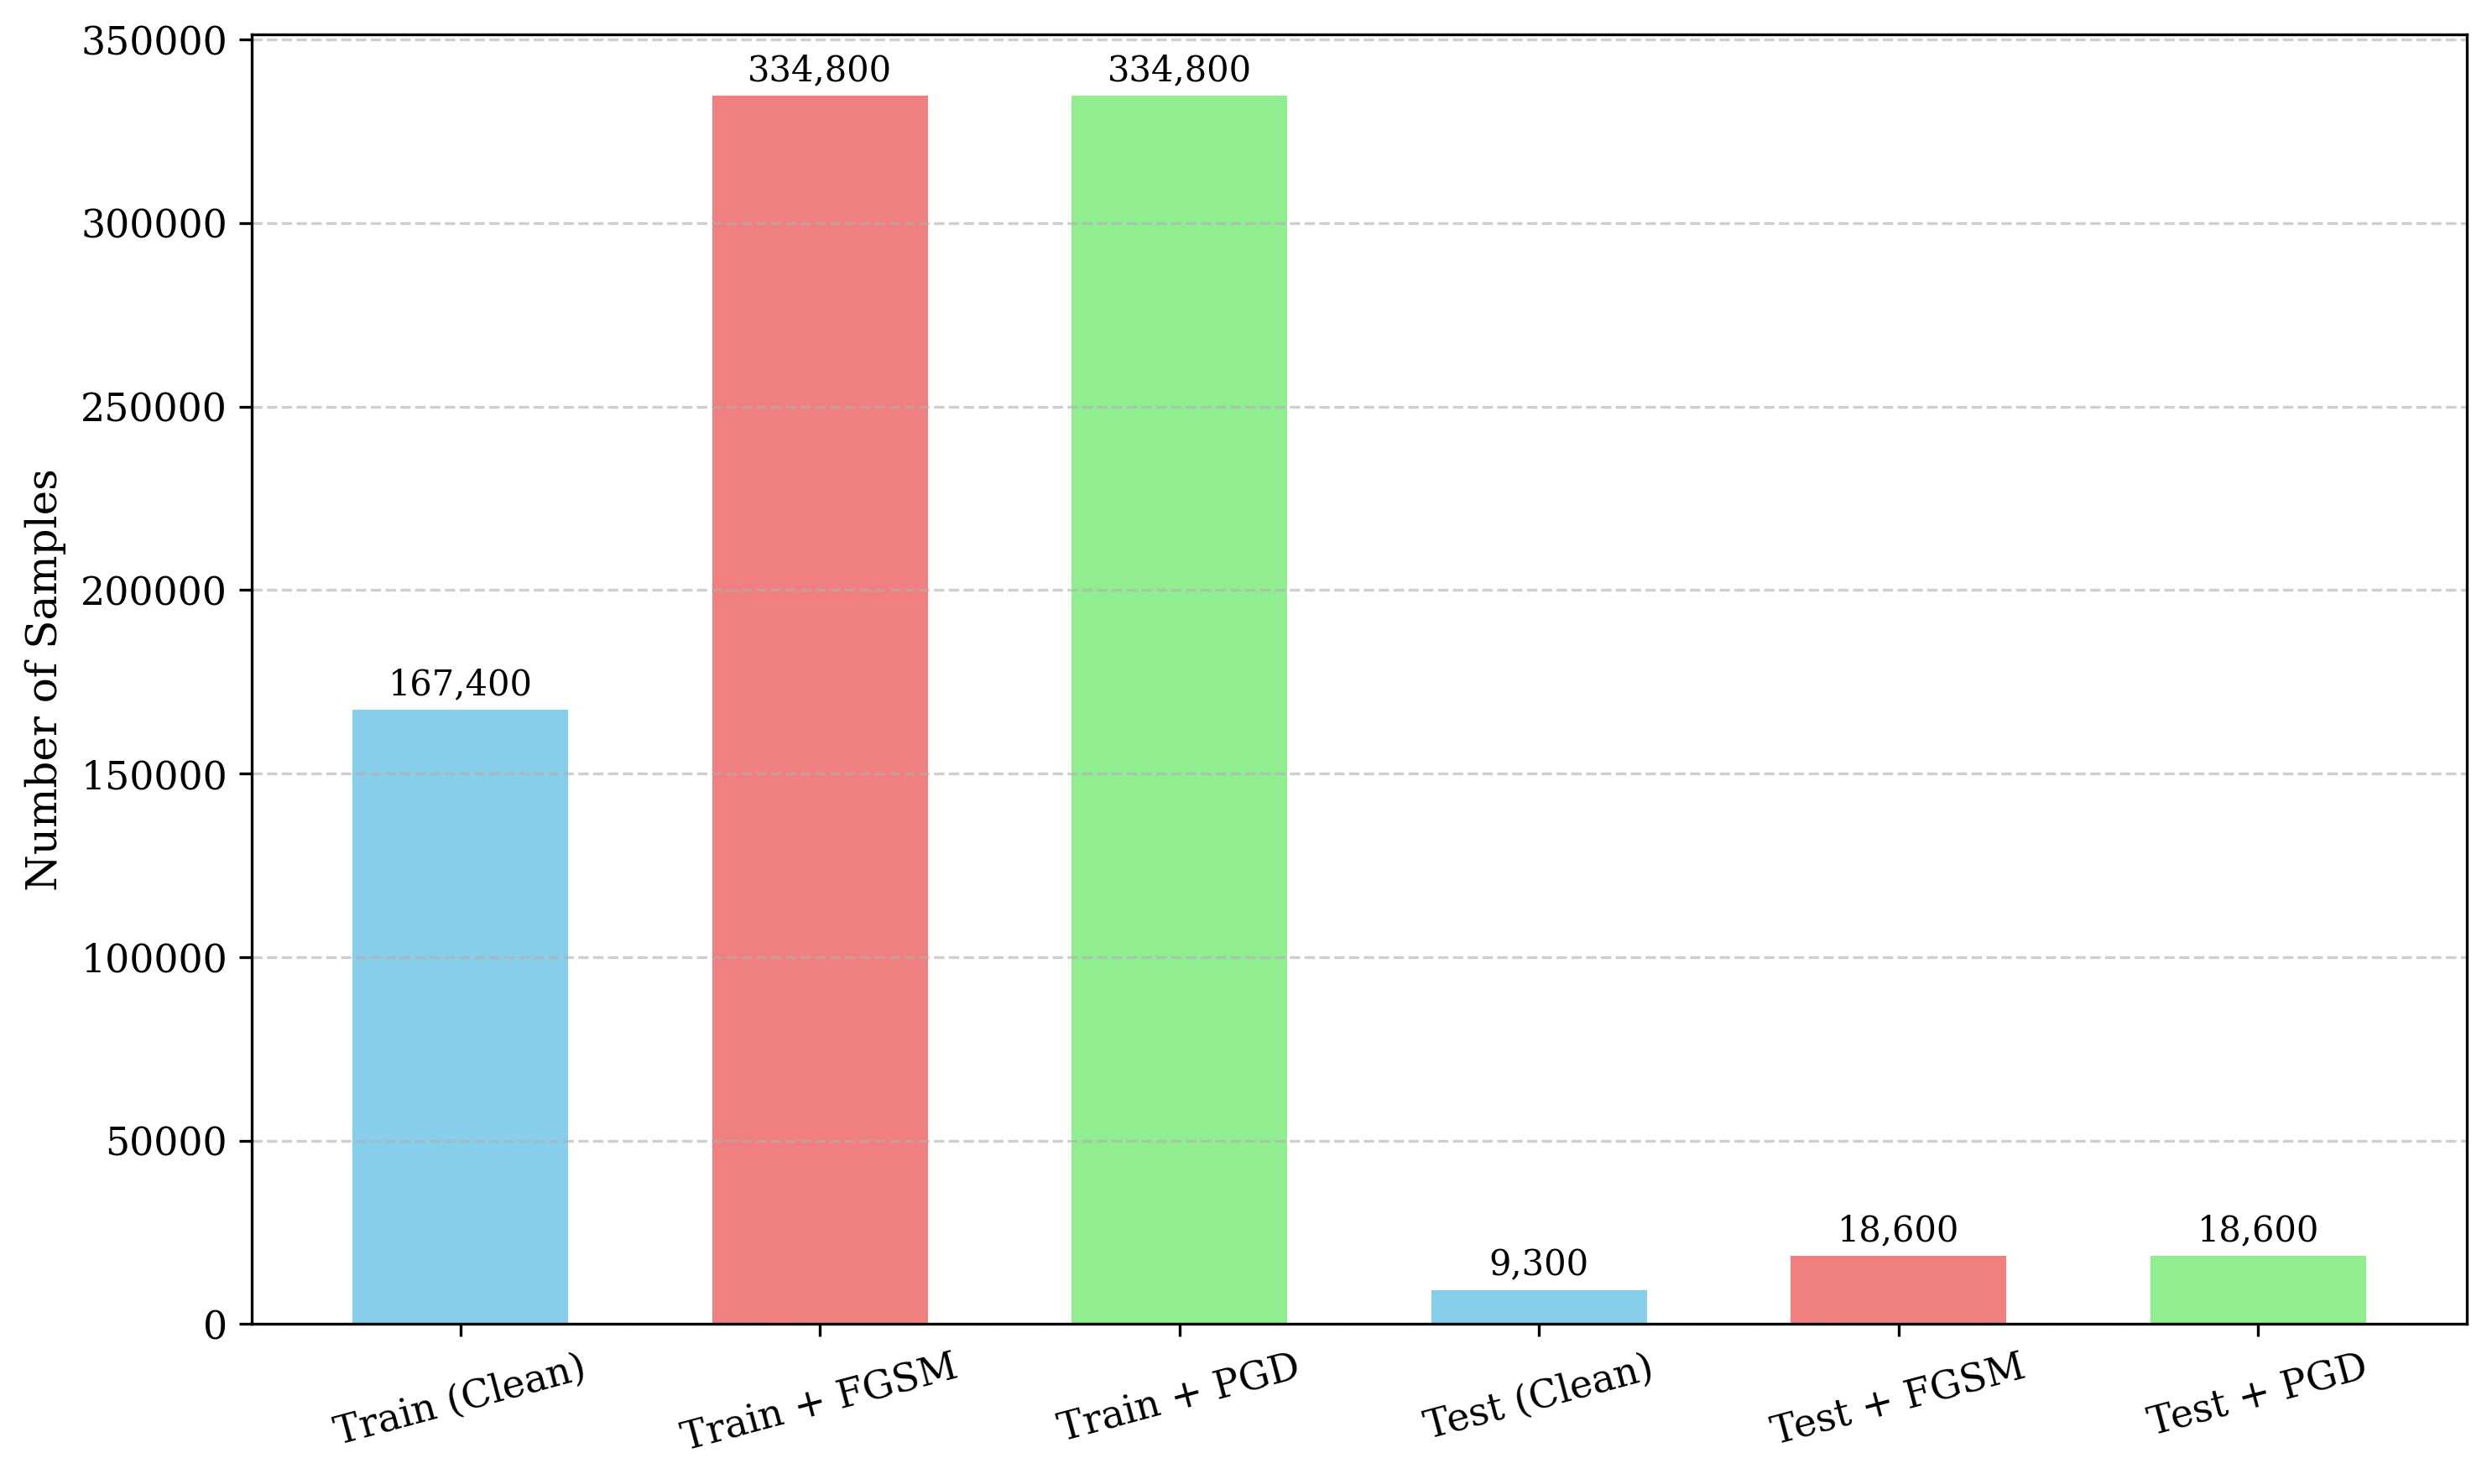

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Dataset categories
datasets = [
    'Train (Clean)', 'Train + FGSM', 'Train + PGD',
    'Test (Clean)', 'Test + FGSM', 'Test + PGD'
]

# Corresponding sizes
sizes = [167400, 334800, 334800, 9300, 18600, 18600]

# Bar colors
colors = ['skyblue', 'lightcoral', 'lightgreen', 'skyblue', 'lightcoral', 'lightgreen']

# X locations for grouped bars
x = np.arange(len(datasets))

# Create high-resolution figure
plt.figure(figsize=(10, 6), dpi=300)
bars = plt.bar(x, sizes, color=colors, width=0.6)

# Add value labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 2000, f'{yval:,}',
             ha='center', va='bottom', fontsize=10, family='serif')

# Customize plot
plt.ylabel('Number of Samples', fontsize=12, family='serif')
plt.xticks(ticks=x, labels=datasets, rotation=15, fontsize=11, family='serif')
plt.yticks(fontsize=11, family='serif')
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Save and show
plt.tight_layout()
plt.savefig("FGSM_PGD_Dataset_Size_BarChart.jpg", dpi=300, bbox_inches='tight')
plt.show()


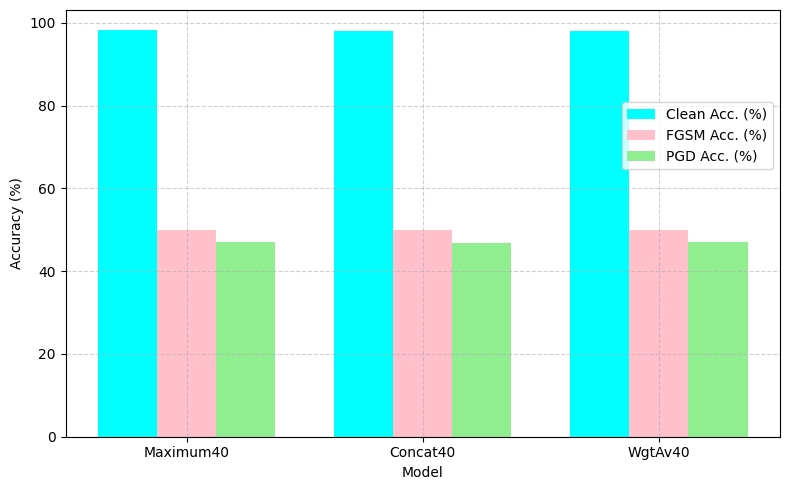

In [6]:
# Import necessary libraries
import matplotlib.pyplot as plt
import pandas as pd

# Define the data
data = {
    'Model': ['Maximum40', 'Concat40', 'WgtAv40'],
    'Clean Acc. (%)': [98.23, 98.17, 98.08],
    'FGSM Acc. (%)': [50.00, 50.00, 50.00],
    'PGD Acc. (%)': [47.00, 46.73, 46.95]
}

# Create DataFrame
df = pd.DataFrame(data)

# Plot settings
fig, ax = plt.subplots(figsize=(8, 5))
bar_width = 0.25
x = range(len(df))

# Plot each accuracy bar
ax.bar([i - bar_width for i in x], df['Clean Acc. (%)'], width=bar_width,
       color='aqua', label='Clean Acc. (%)')
ax.bar(x, df['FGSM Acc. (%)'], width=bar_width,
       color='pink', label='FGSM Acc. (%)')
ax.bar([i + bar_width for i in x], df['PGD Acc. (%)'], width=bar_width,
       color='lightgreen', label='PGD Acc. (%)')

# Add labels and title
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy (%)')
#ax.set_title('Model Accuracy Comparison: Clean vs FGSM vs PGD')
ax.set_xticks(x)
ax.set_xticklabels(df['Model'])
ax.legend(loc='upper right', bbox_to_anchor=(1, 0.80))
ax.grid(True, linestyle='--', alpha=0.6)

# Display the plot
plt.tight_layout()
plt.savefig("Adv_Testing_B4_Adv_Training.jpg", dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Data without adversarial training
data_without_adv = {
    "Model": ["Concat40", "Maximum40", "WgtAv40"],
    "Clean Accuracy (%)": [50.00, 50.00, 50.00],
    "Adversarial Accuracy (%)": [50.00, 50.00, 50.00]
}

# Data with adversarial training
data_with_adv = {
    "Model": ["concat40", "maximum40", "wgtav40"],
    "Epochs": [3, 3, 3],
    "Clean Accuracy (%)": [98.38, 98.13, 98.19],
    "Adversarial Accuracy (%)": [97.91, 97.97, 97.55]
}

# Create DataFrames
df_without_adv = pd.DataFrame(data_without_adv)
df_with_adv = pd.DataFrame(data_with_adv)

# Print tables
print("\ Table 8: Adversarial Robustness Without Adversarial Training\n")
print(df_without_adv.to_string(index=False))

print("\n Table 9: Adversarial Robustness With Adversarial Training\n")
print(df_with_adv.to_string(index=False))



\ Table 8: Adversarial Robustness Without Adversarial Training

    Model  Clean Accuracy (%)  Adversarial Accuracy (%)
 Concat40                50.0                      50.0
Maximum40                50.0                      50.0
  WgtAv40                50.0                      50.0

 Table 9: Adversarial Robustness With Adversarial Training

    Model  Epochs  Clean Accuracy (%)  Adversarial Accuracy (%)
 concat40       3               98.38                     97.91
maximum40       3               98.13                     97.97
  wgtav40       3               98.19                     97.55


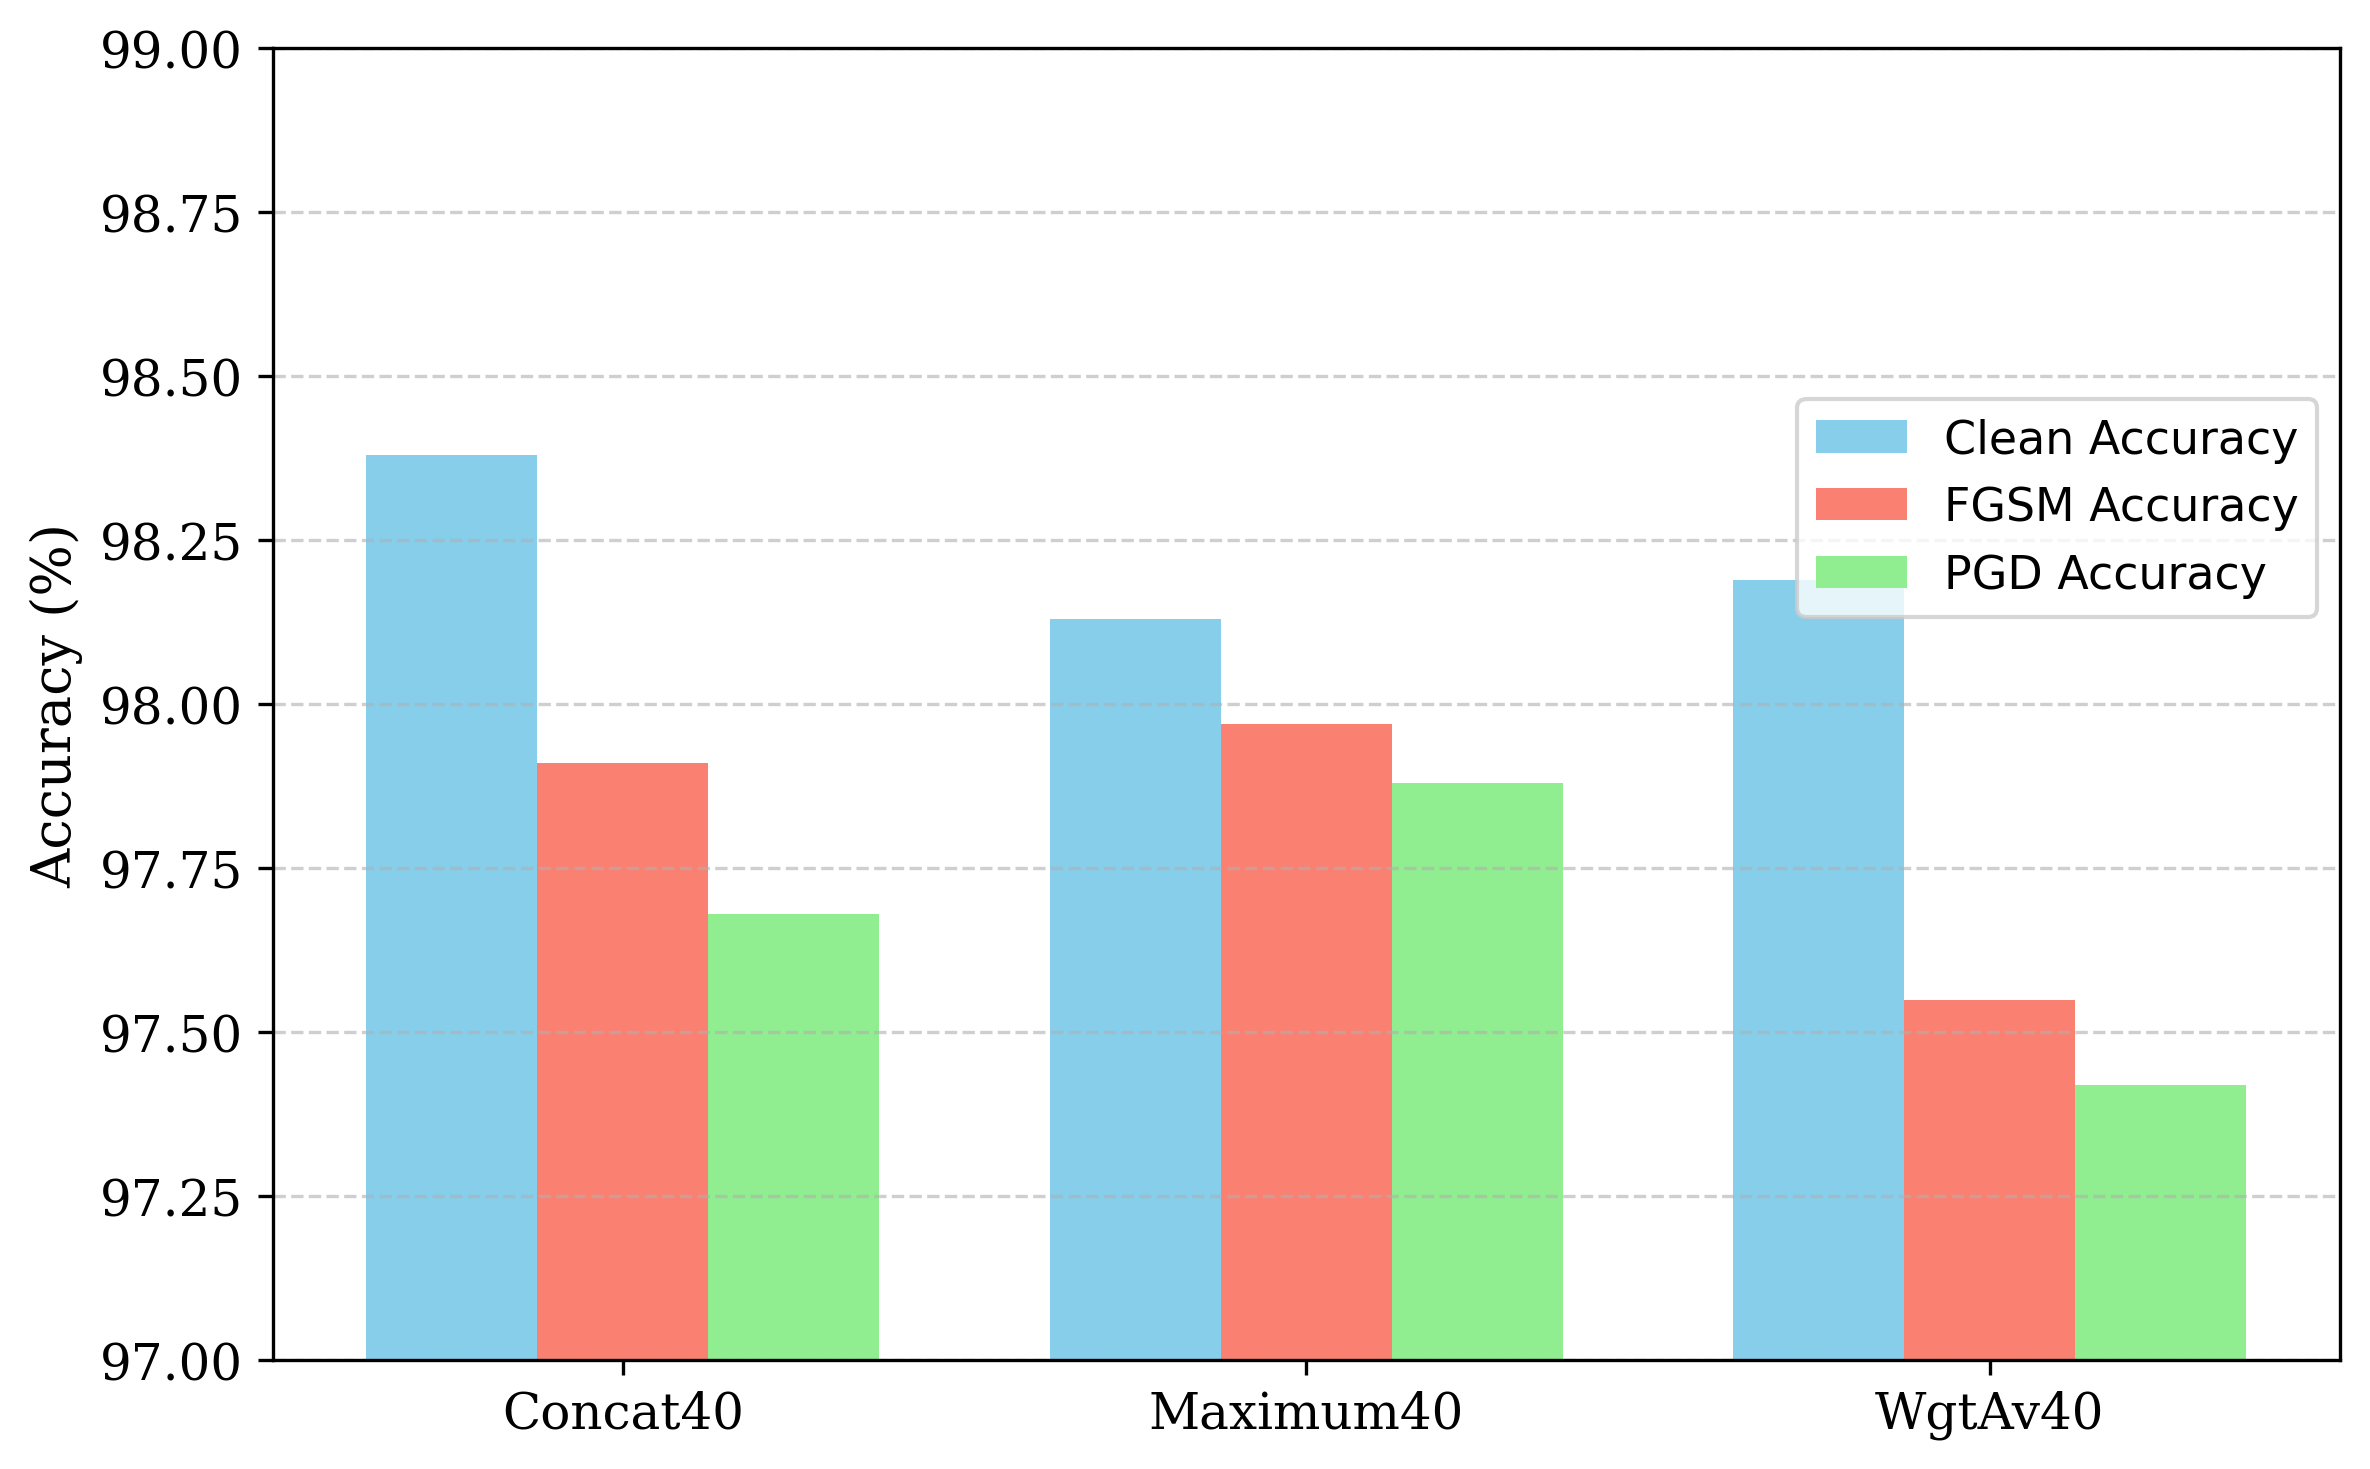

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Model Names
models = ['Concat40', 'Maximum40', 'WgtAv40']

# Accuracy Data
clean_acc = [98.38, 98.13, 98.19]
fgsm_acc = [97.91, 97.97, 97.55]
pgd_acc = [97.68, 97.88, 97.42]

# X-axis positions
x = np.arange(len(models))
width = 0.25

# Plotting
plt.figure(figsize=(8, 5), dpi=300)

# Plot bars
plt.bar(x - width, clean_acc, width=width, label='Clean Accuracy', color='skyblue')
plt.bar(x, fgsm_acc, width=width, label='FGSM Accuracy', color='salmon')
plt.bar(x + width, pgd_acc, width=width, label='PGD Accuracy', color='lightgreen')

# Axis & labels
plt.ylabel('Accuracy (%)', fontsize=13, family='serif')
plt.xticks(ticks=x, labels=models, fontsize=12, family='serif')
plt.yticks(fontsize=12, family='serif')
plt.ylim(97.0, 99.0)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Legend position adjusted
plt.legend(loc='upper right', bbox_to_anchor=(1.0, 0.75), fontsize=11, frameon=True)

# Title (optional)
# plt.title('Impact of Adversarial Training on Model Robustness', fontsize=14, family='serif')

# Save high-res image
plt.tight_layout()
plt.savefig("Adversarial_Training_Impact_PGD_legend075.png", dpi=300, bbox_inches='tight')
plt.show()


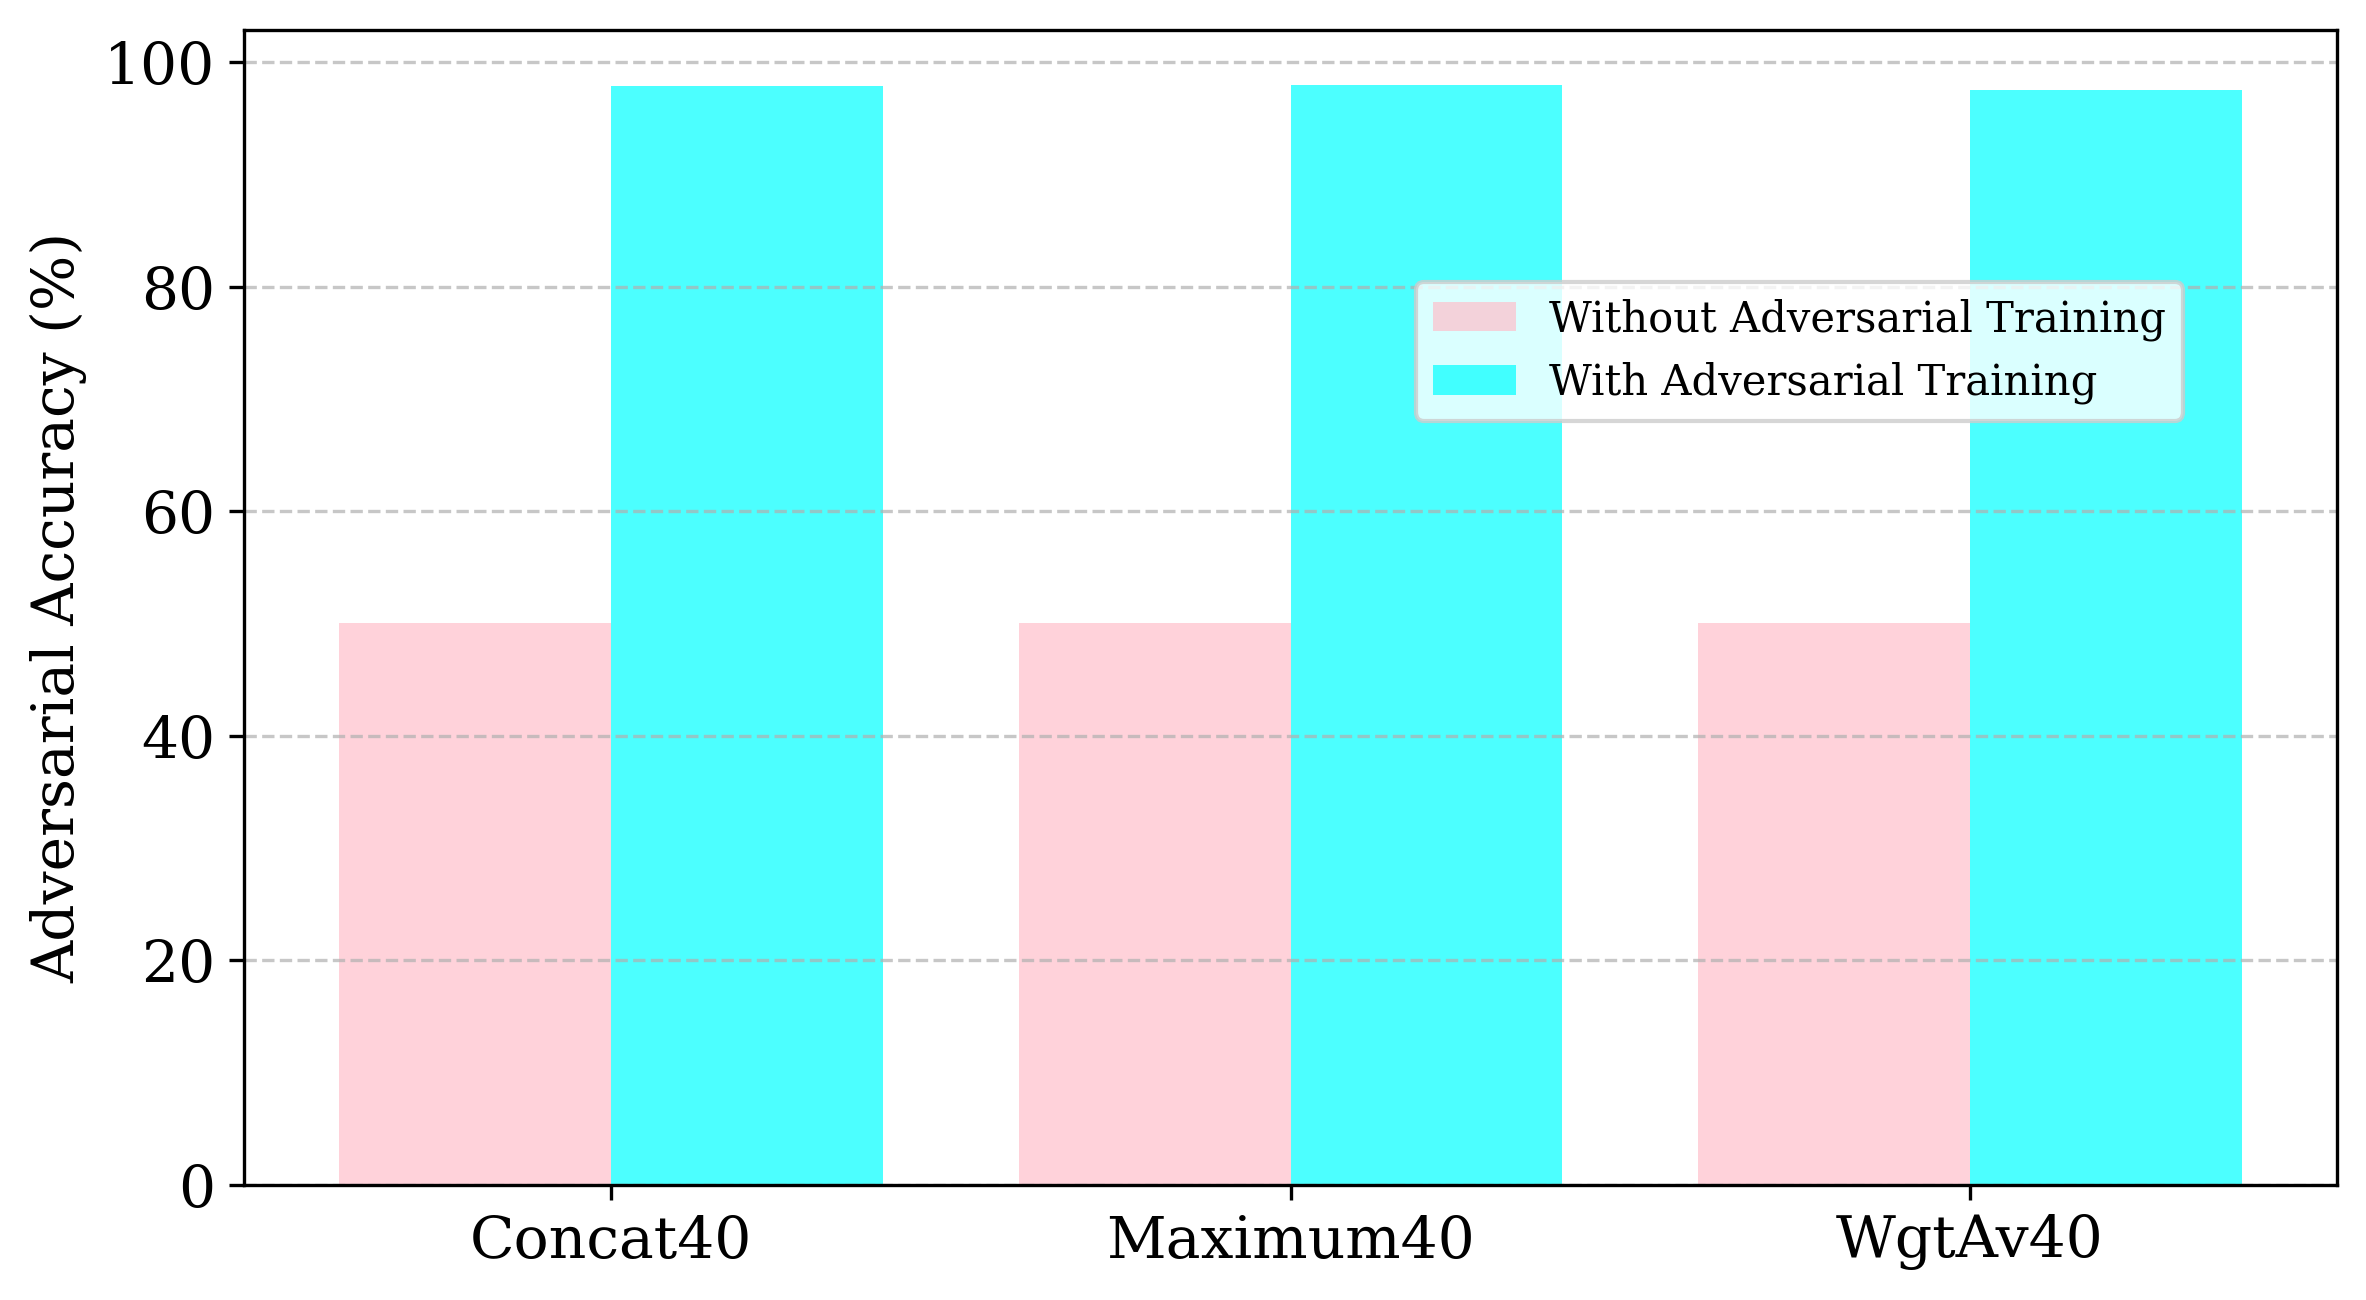

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


df_without_adv = pd.DataFrame(df_without_adv)
df_with_adv = pd.DataFrame(df_with_adv)

# Figure size with extra space for the legend
plt.figure(figsize=(9, 5), dpi=300)

# Bar width
bar_width = 0.4
x = np.arange(len(df_without_adv["Model"]))

# Plot bars side by side
plt.bar(x - bar_width/2, df_without_adv["Adversarial Accuracy (%)"], bar_width,
        label="Without Adversarial Training", color="pink", alpha=0.7)
plt.bar(x + bar_width/2, df_with_adv["Adversarial Accuracy (%)"], bar_width,
        label="With Adversarial Training", color="cyan", alpha=0.7)

# Labels and Titles
#plt.xlabel("Model", fontsize=14, fontfamily="serif")
plt.ylabel("Adversarial Accuracy (%)", fontsize=14, fontfamily="serif")
#plt.title("Impact of Adversarial Training on Accuracy", fontsize=14, fontfamily="serif")
plt.xticks(ticks=x, labels=df_without_adv["Model"], fontsize=14, fontfamily="serif")
plt.yticks(fontsize=14, fontfamily="serif")

# Adjust legend position outside the plot with more space
plt.legend(prop={'size': 10, 'family': 'serif'}, loc="upper left", bbox_to_anchor=(0.55,0.8))

# Gridlines for better readability
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Save and show plot
plt.savefig("Adv_Testing_B4_Adv_Training.jpg", dpi=300, bbox_inches="tight")
plt.show()


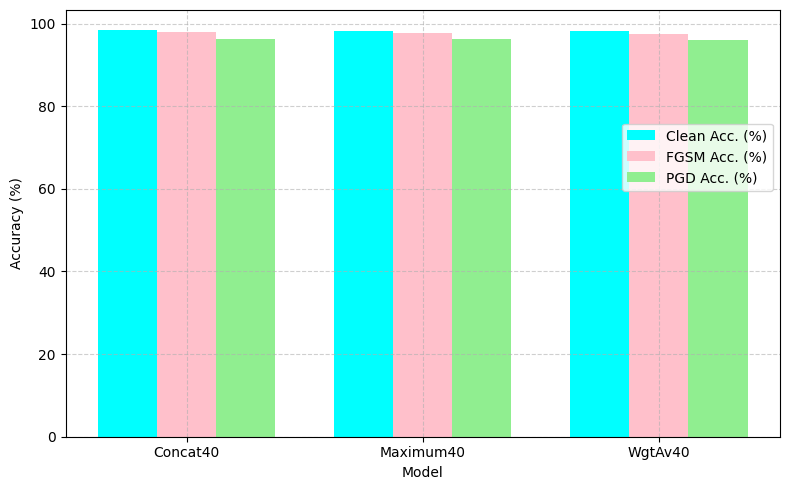

In [11]:
# Import required libraries
import matplotlib.pyplot as plt
import pandas as pd

# Define the data
data = {
    'Model': ['Concat40', 'Maximum40', 'WgtAv40'],
    'Clean Acc. (%)': [98.38, 98.13, 98.19],
    'FGSM Acc. (%)': [97.91, 97.70, 97.41],
    'PGD Acc. (%)': [96.30, 96.30, 96.03]
}

# Create DataFrame
df = pd.DataFrame(data)

# Plot settings
fig, ax = plt.subplots(figsize=(8, 5))
bar_width = 0.25
x = range(len(df))

# Plot bars with light colors
ax.bar([i - bar_width for i in x], df['Clean Acc. (%)'], width=bar_width, color='aqua', label='Clean Acc. (%)')
ax.bar(x, df['FGSM Acc. (%)'], width=bar_width, color='pink', label='FGSM Acc. (%)')
ax.bar([i + bar_width for i in x], df['PGD Acc. (%)'], width=bar_width, color='lightgreen', label='PGD Acc. (%)')

# Add labels and formatting
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy (%)')
#ax.set_title('Accuracy After Adversarial Training (FGSM and PGD)')
ax.set_xticks(x)
ax.set_xticklabels(df['Model'])
ax.legend(loc='upper right', bbox_to_anchor=(1, 0.75))
ax.grid(True, linestyle='--', alpha=0.6)

# Show plot
plt.tight_layout()
plt.savefig("Adv_Testing_After_Adv_Training.jpg", dpi=300, bbox_inches="tight")
plt.show()
